In [1]:
import os

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pprint

from GAN_INT import GAN_INT

%matplotlib inline


pp = pprint.PrettyPrinter()

flags = tf.app.flags

flags.DEFINE_integer('X_dim', 784, 'dimension of the original image [784]')
flags.DEFINE_integer('nwords', 6, 'number of words in the input sentence (e.g. "thin number one with left skew") [6]')
flags.DEFINE_integer('vocab_size', 19, 'size of the vocabulary [19]')
flags.DEFINE_integer('z_dim', 5, 'dimension of the generator input noise variable z [100]')
flags.DEFINE_integer('c_dim', 5, 'dimension of input code variable c [2]')
flags.DEFINE_integer('e_dim', 10, 'dimension of the word embedding phi [20]')
flags.DEFINE_integer('d_update', 1, 'update the discriminator weights [d_update] times per generator update [5]')
flags.DEFINE_integer('niter', 2801, 'number of iterations to use during training [600]')
flags.DEFINE_integer('batch_size', 128, 'batch size to use during training [128]')
flags.DEFINE_float('beta', 0.5, 'variable that parameterizes the amount of interpolation between two text embeddings [0.5]')
flags.DEFINE_float('lr', 0.001, 'learning rate of the optimizer to use during training [0.001]')
flags.DEFINE_string('checkpoint_dir', '.\\checkpoints', 'checkpoint directory [.\\checkpoints]')
flags.DEFINE_string('image_dir', '.\\images', 'directory to save generated images to [.\\images]')
flags.DEFINE_bool('use_adam', True, 'if True, use Adam optimizer; otherwise, use SGD [True]')
flags.DEFINE_bool('show_progress', False, 'print progress [False]')
FLAGS = flags.FLAGS

if not os.path.exists(FLAGS.checkpoint_dir):
    os.makedirs(FLAGS.checkpoint_dir)

pp.pprint(flags.FLAGS.__flags)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
{'X_dim': 784,
 'batch_size': 128,
 'beta': 0.5,
 'c_dim': 5,
 'checkpoint_dir': '.\\checkpoints',
 'd_update': 1,
 'e_dim': 10,
 'image_dir': '.\\images',
 'lr': 0.001,
 'niter': 2801,
 'nwords': 6,
 'show_progress': False,
 'use_adam': True,
 'vocab_size': 19,
 'z_dim': 5}


In [2]:
with tf.Session() as sess:
    model = GAN_INT(FLAGS, sess)
    model.build_model()
    model.run()

{'D Loss': 1.5150144, 'G Loss': 3.068388, 'Iteration': 0}
['normal number four with left skew', 'normal number three with left skew', 'thin number zero with left skew', 'thin number one with average skew', 'normal number zero with left skew', 'thin number three with left skew', 'thin number two with right skew', 'thin number seven with average skew', 'thick number seven with left skew', 'normal number seven with left skew', 'thin number two with average skew', 'thin number zero with left skew', 'thin number one with right skew', 'thin number three with right skew', 'normal number seven with right skew', 'thin number four with right skew']
{'D Loss': 1.0734458, 'G Loss': 5.5057044, 'Iteration': 200}
['thin number three with right skew', 'thick number six with right skew', 'normal number three with right skew', 'thick number nine with right skew', 'thin number zero with right skew', 'thin number nine with right skew', 'normal number seven with average skew', 'thick number four with left 

{'D Loss': 1.0805045, 'G Loss': 4.5058374, 'Iteration': 2600}
['thick number zero with average skew', 'thin number six with left skew', 'thick number three with right skew', 'thin number five with right skew', 'thick number seven with right skew', 'thick number eight with right skew', 'normal number two with average skew', 'thick number four with right skew', 'thin number six with right skew', 'thick number four with right skew', 'thin number nine with average skew', 'thick number eight with left skew', 'thin number one with average skew', 'thin number zero with left skew', 'thick number seven with right skew', 'thin number zero with average skew']
{'D Loss': 1.0372655, 'G Loss': 4.510766, 'Iteration': 2800}
['thick number eight with average skew', 'thin number nine with left skew', 'thick number eight with left skew', 'thin number four with average skew', 'thick number six with right skew', 'thick number seven with right skew', 'thick number two with average skew', 'normal number four

In [2]:
with tf.Session() as sess:
    model = Txt2ImgGAN(FLAGS, sess)
    model.build_model()
    sentences = ['thin number zero with left skew', \
                 'thin number zero with average skew', \
                 'thin number zero with right skew']
    samples1 = model.generate(sentences)
    samples2 = model.generate(sentences)

[*] Reading Checkpoints...
INFO:tensorflow:Restoring parameters from .\checkpoints\StackGAN.model
[*] Reading Checkpoints...
INFO:tensorflow:Restoring parameters from .\checkpoints\StackGAN.model


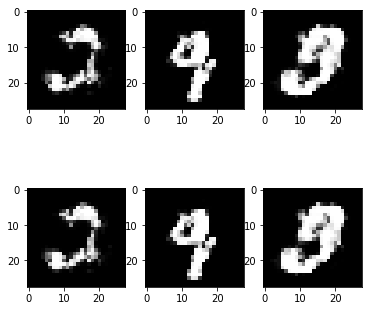

In [3]:
plt.figure(figsize=(6, 6))

for i in range(3):

    plt.subplot(2, 3, 1 + i)
    plt.imshow(np.reshape(samples1[i], (28, 28)), vmin=0, vmax=1, interpolation='NONE', cmap=plt.get_cmap('gray'))
    
    plt.subplot(2, 3, 4 + i)
    plt.imshow(np.reshape(samples1[i], (28, 28)), vmin=0, vmax=1, interpolation='NONE', cmap=plt.get_cmap('gray'))